In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('./gender_classification.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
le = LabelEncoder()

In [4]:
df['gender'] = le.fit_transform(df['gender'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 293.2 KB


In [6]:
df.shape

(5001, 8)

In [7]:
df.isnull().mean()*100

long_hair                    0.0
forehead_width_cm            0.0
forehead_height_cm           0.0
nose_wide                    0.0
nose_long                    0.0
lips_thin                    0.0
distance_nose_to_lip_long    0.0
gender                       0.0
dtype: float64

In [8]:
df.duplicated().sum()

1768

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000
mean,0.822456,13.217198,5.966038,0.536344,0.557686,0.538509,0.545314,0.551500
std,0.382188,1.115993,0.549789,0.498755,0.496738,0.498592,0.498019,0.497418
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.300000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.200000,5.900000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,14.100000,6.400000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

#### EDA

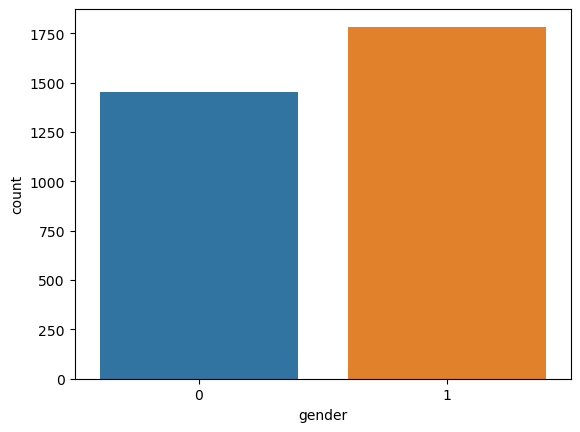

In [12]:
sns.countplot(data=df,x='gender');

#### balancing method 1

In [13]:
x = df.iloc[:,:-1].values

In [14]:
y = df.iloc[:,-1:].values

In [15]:
sc = StandardScaler()

In [16]:
x = sc.fit_transform(x)

In [17]:
#from imblearn.over_sampling import RandomOverSampler

In [18]:
#oversample = RandomOverSampler(sampling_strategy='minority')

In [19]:
#xOver,yOver = oversample.fit_resample(x,y)

In [20]:
#sns.countplot(x=yOver);

#### Balancing method 2

undersampling

In [21]:
#from imblearn.under_sampling import RandomUnderSampler

In [22]:
#undersample = RandomUnderSampler()

In [23]:
#xUnder,yUnder = undersample.fit_resample(x,y)

In [24]:
#yUnder

In [25]:
#sns.countplot(x=yUnder);

#### balancingMethod 3

SMOTE

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
smote = SMOTE()

In [28]:
xSmote,ySmote = smote.fit_resample(x,y)

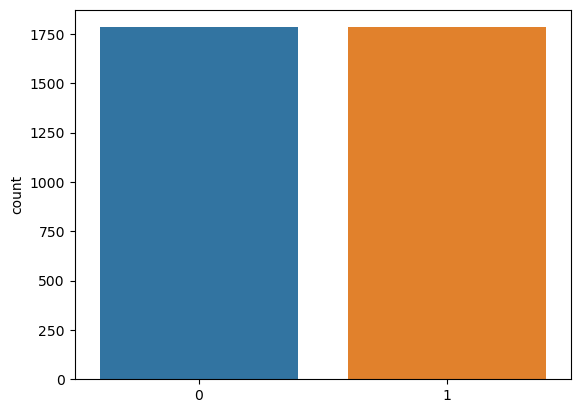

In [29]:
sns.countplot(x=ySmote);

#### Balancing Method 4

ADASYN

In [30]:
#from imblearn.over_sampling import ADASYN

In [31]:
#adasyn = ADASYN()

In [32]:
#x_adasyn,y_adasyn = adasyn.fit_resample(x,y)

In [33]:
#y_adasyn

In [34]:
#sns.countplot(x=y_adasyn);

# <center> CrossValidation

In [35]:
models = {'LogisticRegression':LogisticRegression(),
          'RandomForestClassifier':RandomForestClassifier(),
          'AdaBoostClassifier':AdaBoostClassifier(),
          'HistGradientBoostingClassifier':HistGradientBoostingClassifier(),
          'DecisionTreeClassifier':DecisionTreeClassifier(),
          'KNeighborsClassifier':KNeighborsClassifier()
}

In [36]:
for name, model in models.items():
    scores = cross_val_score(model,x,y,scoring='accuracy',cv=10,n_jobs=-1)
    print(f'cv model:{name}')
    print('meanscore:',np.mean(scores))
    print('*'*100)

cv model:LogisticRegression
meanscore: 0.9511218132477162
****************************************************************************************************
cv model:RandomForestClassifier
meanscore: 0.9523621144364178
****************************************************************************************************
cv model:AdaBoostClassifier
meanscore: 0.9600982303252685
****************************************************************************************************
cv model:HistGradientBoostingClassifier
meanscore: 0.9532918625539883
****************************************************************************************************
cv model:DecisionTreeClassifier
meanscore: 0.9421539961013645
****************************************************************************************************
cv model:KNeighborsClassifier
meanscore: 0.945868210832091
****************************************************************************************************


In [37]:
model = AdaBoostClassifier()

In [38]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [39]:
model.fit(x_train,y_train)

AdaBoostClassifier()

In [40]:
model.score(x_test,y_test)

0.9613601236476044

In [41]:
y_pred = model.predict(x_test)

In [42]:
test_score =accuracy_score(y_test,y_pred)
test_score

0.9613601236476044

In [43]:
con_test = confusion_matrix(y_test,y_pred)
con_test

array([[301,   7],
       [ 18, 321]], dtype=int64)

In [44]:
print('wrong predictions made',(y_test != y_pred).sum(),'/',((y_test == y_pred).sum()+(y_test != y_pred).sum()))

wrong predictions made 209165 / 418609


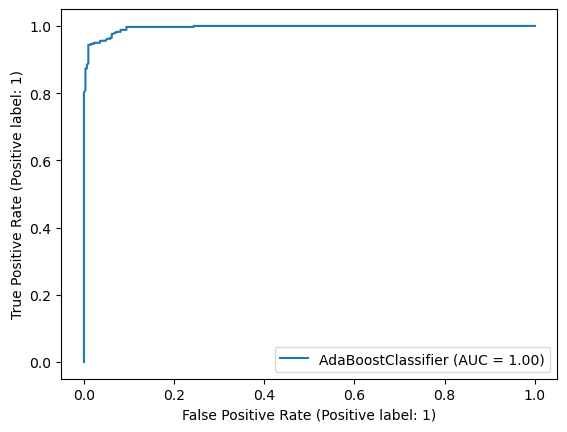

In [45]:
Roc = RocCurveDisplay.from_estimator(model,x_test,y_test)